In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [125]:
data = pd.read_csv("4w1.csv")

Features and Target variables

In [126]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [127]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [128]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [129]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [169]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
13/13 [==============================] - 2s 24ms/step - loss: 352.9134 - val_loss: 365.6387
Epoch 2/800
13/13 [==============================] - 0s 6ms/step - loss: 342.9215 - val_loss: 341.2782
Epoch 3/800
13/13 [==============================] - 0s 5ms/step - loss: 240.1487 - val_loss: 46.9963
Epoch 4/800
13/13 [==============================] - 0s 5ms/step - loss: 57.6340 - val_loss: 54.4653
Epoch 5/800
13/13 [==============================] - 0s 6ms/step - loss: 44.9409 - val_loss: 44.7104
Epoch 6/800
13/13 [==============================] - 0s 6ms/step - loss: 41.6032 - val_loss: 43.3537
Epoch 7/800
13/13 [==============================] - 0s 6ms/step - loss: 42.4444 - val_loss: 41.8559
Epoch 8/800
13/13 [==============================] - 0s 6ms/step - loss: 41.6256 - val_loss: 41.9897
Epoch 9/800
13/13 [==============================] - 0s 7ms/step - loss: 42.4144 - val_loss: 41.7770
Epoch 10/800
13/13 [==============================] - 0s 6ms/step - loss: 41.7826 - v

Visualize LSTM results

0.4785556419759771


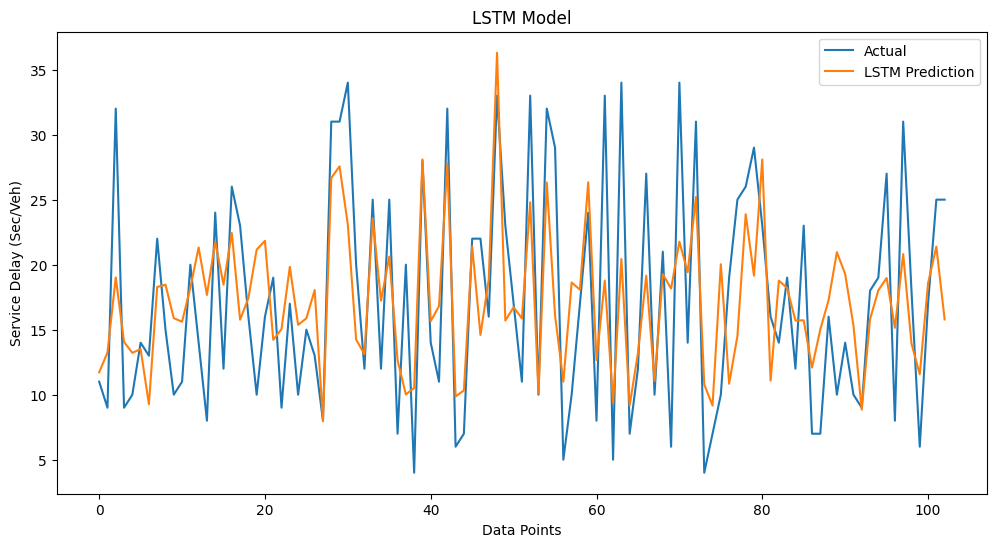

In [168]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [165]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/500
13/13 [==============================] - 8s 33ms/step - loss: 349.8490 - val_loss: 356.2079
Epoch 2/500
13/13 [==============================] - 0s 8ms/step - loss: 309.3059 - val_loss: 235.7789
Epoch 3/500
13/13 [==============================] - 0s 8ms/step - loss: 93.0609 - val_loss: 66.5890
Epoch 4/500
13/13 [==============================] - 0s 8ms/step - loss: 47.3116 - val_loss: 42.1818
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 41.8730 - val_loss: 43.5712
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 43.5289 - val_loss: 43.5787
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 41.9001 - val_loss: 43.6087
Epoch 8/500
13/13 [==============================] - 0s 7ms/step - loss: 41.2016 - val_loss: 41.8668
Epoch 9/500
13/13 [==============================] - 0s 7ms/step - loss: 39.9921 - val_loss: 42.9925
Epoch 10/500
13/13 [==============================] - 0s 8ms/step - loss: 41.9075 - va

Visualize BiLSTM results

0.4787186708576523


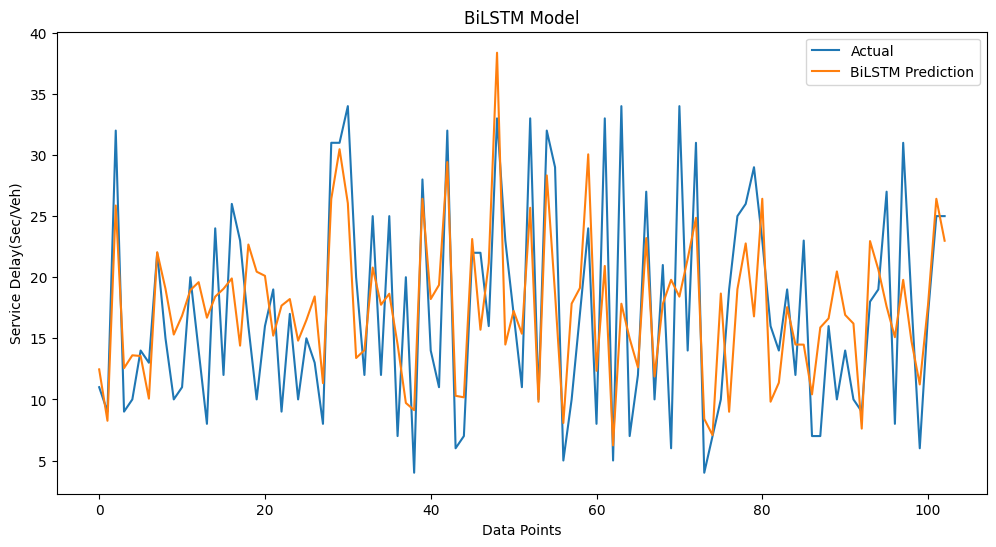

In [166]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [134]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/192
13/13 [==============================] - 2s 25ms/step - loss: 349.6942 - val_loss: 357.5578
Epoch 2/192
13/13 [==============================] - 0s 5ms/step - loss: 327.8039 - val_loss: 313.3976
Epoch 3/192
13/13 [==============================] - 0s 5ms/step - loss: 210.1952 - val_loss: 45.6422
Epoch 4/192
13/13 [==============================] - 0s 6ms/step - loss: 62.1193 - val_loss: 71.6015
Epoch 5/192
13/13 [==============================] - 0s 5ms/step - loss: 53.2370 - val_loss: 48.2719
Epoch 6/192
13/13 [==============================] - 0s 4ms/step - loss: 42.9291 - val_loss: 46.3520
Epoch 7/192
13/13 [==============================] - 0s 5ms/step - loss: 42.7446 - val_loss: 45.4223
Epoch 8/192
13/13 [==============================] - 0s 5ms/step - loss: 41.8611 - val_loss: 44.5095
Epoch 9/192
13/13 [==============================] - 0s 5ms/step - loss: 41.4911 - val_loss: 44.5691
Epoch 10/192
13/13 [==============================] - 0s 5ms/step - loss: 41.6589 - v

Visualize GRU results

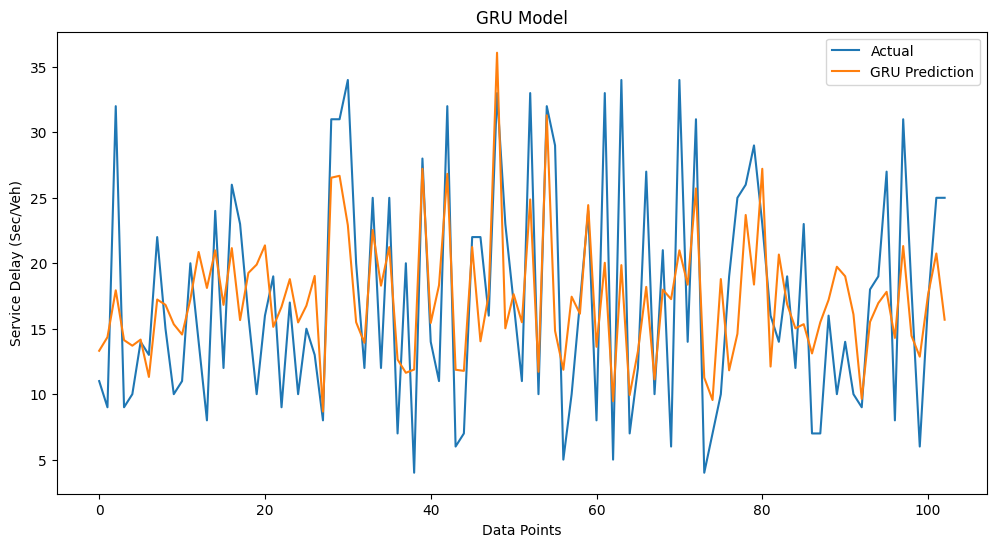

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [136]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/192
13/13 [==============================] - 4s 34ms/step - loss: 347.8205 - val_loss: 352.3432
Epoch 2/192
13/13 [==============================] - 0s 7ms/step - loss: 315.2484 - val_loss: 283.7297
Epoch 3/192
13/13 [==============================] - 0s 7ms/step - loss: 160.6052 - val_loss: 89.9190
Epoch 4/192
13/13 [==============================] - 0s 8ms/step - loss: 58.2014 - val_loss: 62.7956
Epoch 5/192
13/13 [==============================] - 0s 7ms/step - loss: 50.3069 - val_loss: 52.0000
Epoch 6/192
13/13 [==============================] - 0s 6ms/step - loss: 46.0263 - val_loss: 50.5941
Epoch 7/192
13/13 [==============================] - 0s 7ms/step - loss: 44.6558 - val_loss: 48.7431
Epoch 8/192
13/13 [==============================] - 0s 6ms/step - loss: 43.5332 - val_loss: 47.1241
Epoch 9/192
13/13 [==============================] - 0s 7ms/step - loss: 42.4863 - val_loss: 45.0610
Epoch 10/192
13/13 [==============================] - 0s 5ms/step - loss: 43.6766 - v

Visualize BiGRU results

0.4786644262859787


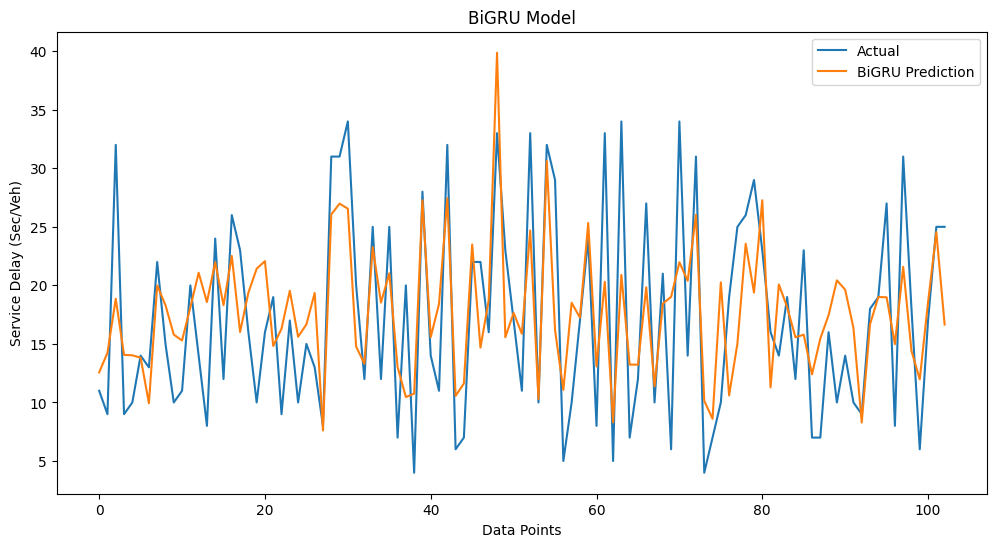

In [137]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [138]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=300, batch_size=64, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/300
7/7 [==============================] - 1s 24ms/step - loss: 348.3612 - val_loss: 354.3316
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 331.9871 - val_loss: 334.0257
Epoch 3/300
7/7 [==============================] - 0s 4ms/step - loss: 309.1375 - val_loss: 304.7057
Epoch 4/300
7/7 [==============================] - 0s 5ms/step - loss: 276.8495 - val_loss: 264.8830
Epoch 5/300
7/7 [==============================] - 0s 5ms/step - loss: 233.5628 - val_loss: 214.6604
Epoch 6/300
7/7 [==============================] - 0s 5ms/step - loss: 181.4794 - val_loss: 157.5594
Epoch 7/300
7/7 [==============================] - 0s 5ms/step - loss: 125.9606 - val_loss: 102.7254
Epoch 8/300
7/7 [==============================] - 0s 6ms/step - loss: 77.3699 - val_loss: 64.6951
Epoch 9/300
7/7 [==============================] - 0s 5ms/step - loss: 50.7471 - val_loss: 53.1515
Epoch 10/300
7/7 [==============================] - 0s 5ms/step - loss: 47.6067 - val_loss: 55

Visualize CNN results

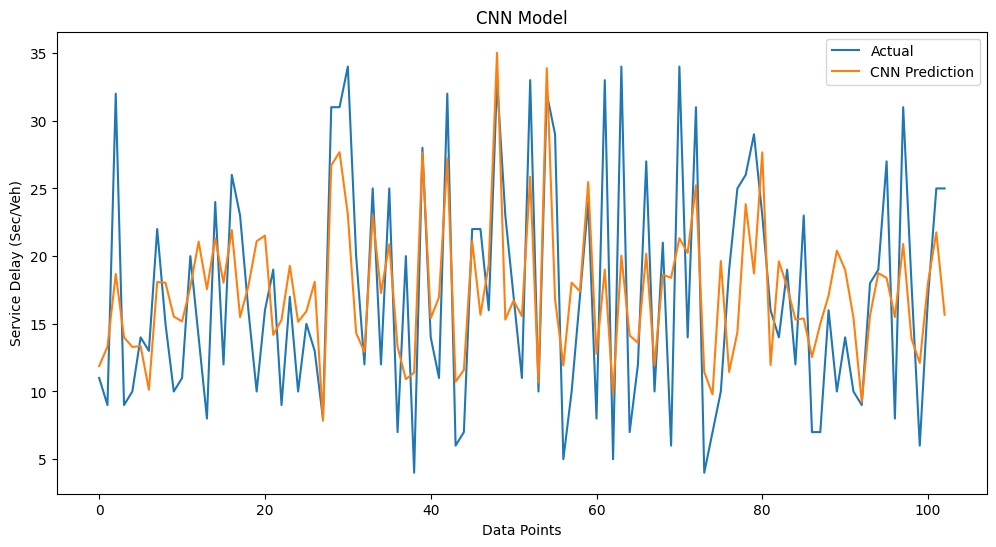

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [140]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/300
13/13 [==============================] - 1s 16ms/step - loss: 353.2571 - val_loss: 365.1735
Epoch 2/300
13/13 [==============================] - 0s 5ms/step - loss: 344.4094 - val_loss: 350.7097
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 315.4390 - val_loss: 284.9031
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 166.9800 - val_loss: 42.3239
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 60.0003 - val_loss: 49.5856
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 47.8688 - val_loss: 41.8886
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 42.8236 - val_loss: 41.9534
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 41.7035 - val_loss: 41.8476
Epoch 9/300
13/13 [==============================] - 0s 5ms/step - loss: 41.2107 - val_loss: 41.8793
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 40.8330 -

Visualize CNN_LSTM results

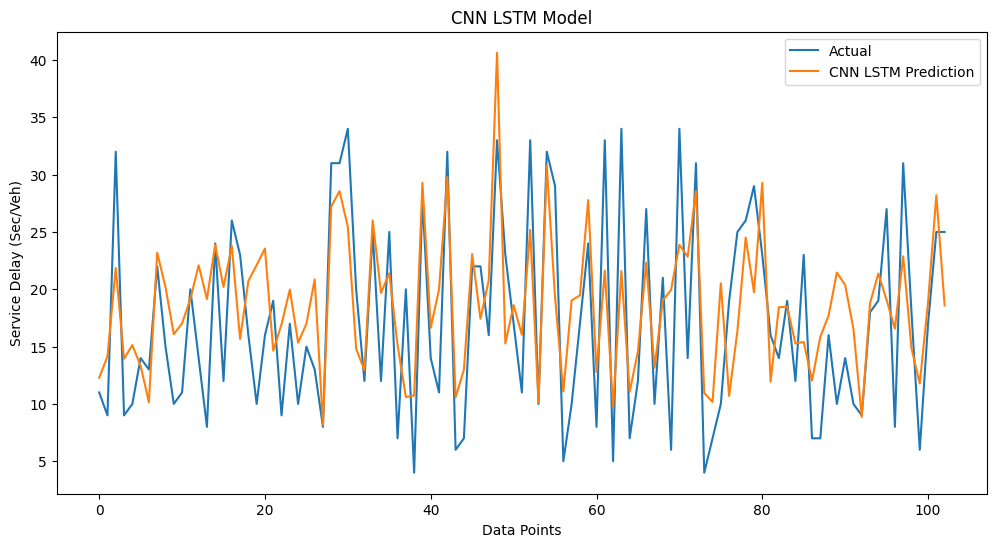

In [141]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [142]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/300
13/13 [==============================] - 1s 20ms/step - loss: 348.6807 - val_loss: 355.4421
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 325.2555 - val_loss: 309.2529
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 223.0681 - val_loss: 85.9660
Epoch 4/300
13/13 [==============================] - 0s 8ms/step - loss: 55.0095 - val_loss: 42.1740
Epoch 5/300
13/13 [==============================] - 0s 6ms/step - loss: 45.5472 - val_loss: 41.7226
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 40.7550 - val_loss: 42.1339
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 40.4182 - val_loss: 44.2506
Epoch 8/300
13/13 [==============================] - 0s 9ms/step - loss: 39.5121 - val_loss: 41.8676
Epoch 9/300
13/13 [==============================] - 0s 7ms/step - loss: 39.6029 - val_loss: 41.0917
Epoch 10/300
13/13 [==============================] - 0s 7ms/step - loss: 38.8679 - v

Visualize CNN_BiLSTM results

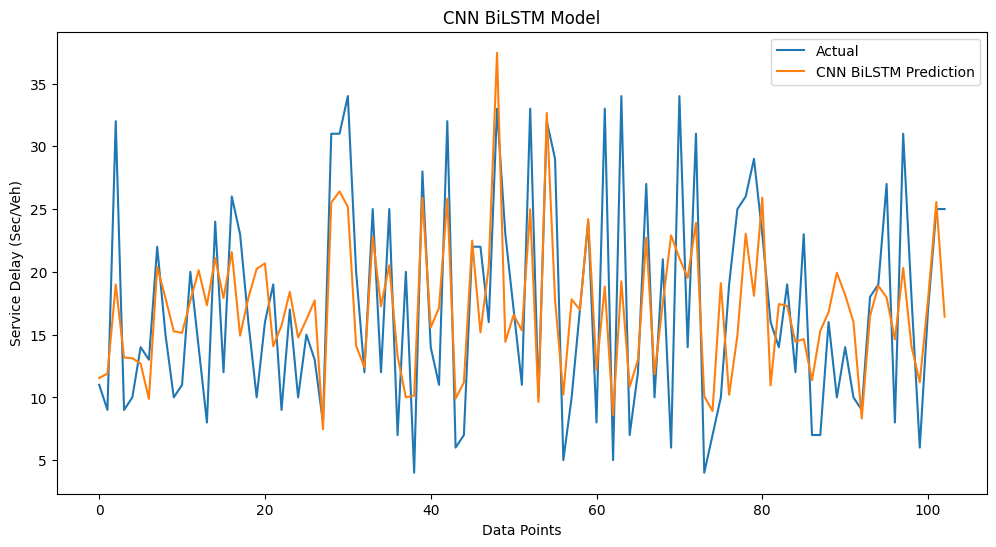

In [143]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [144]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

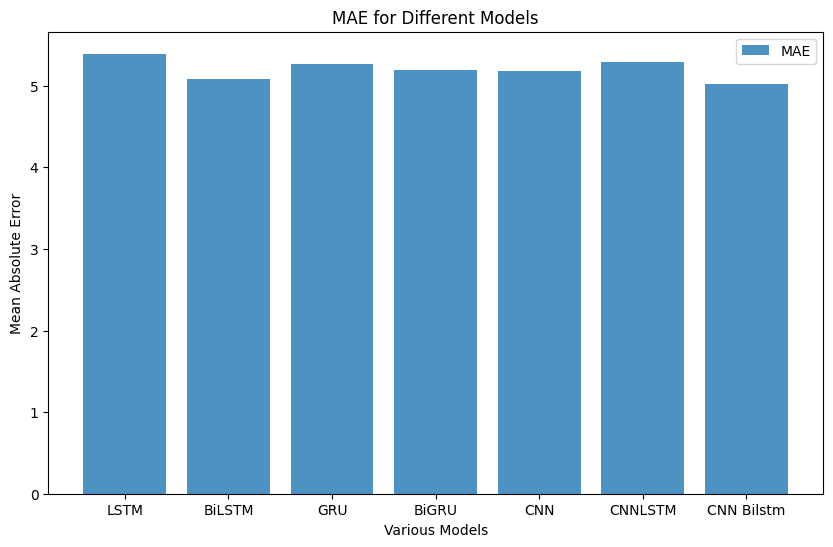

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

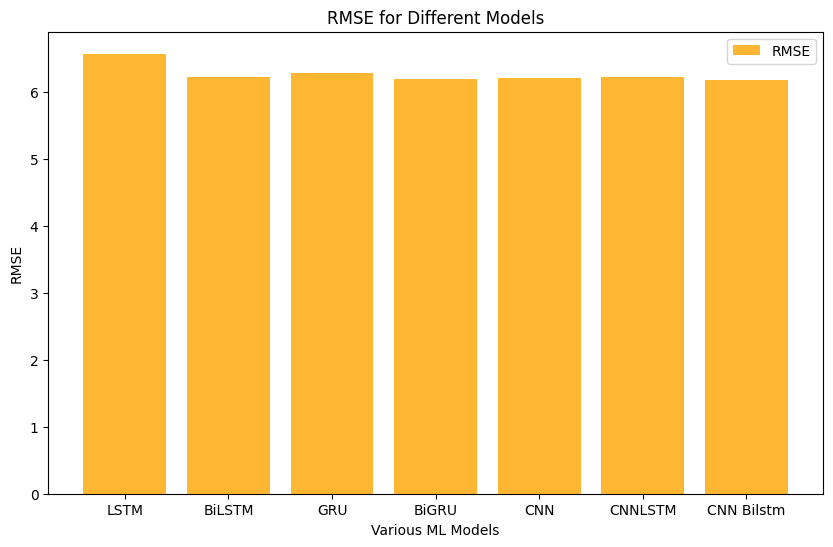

In [146]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

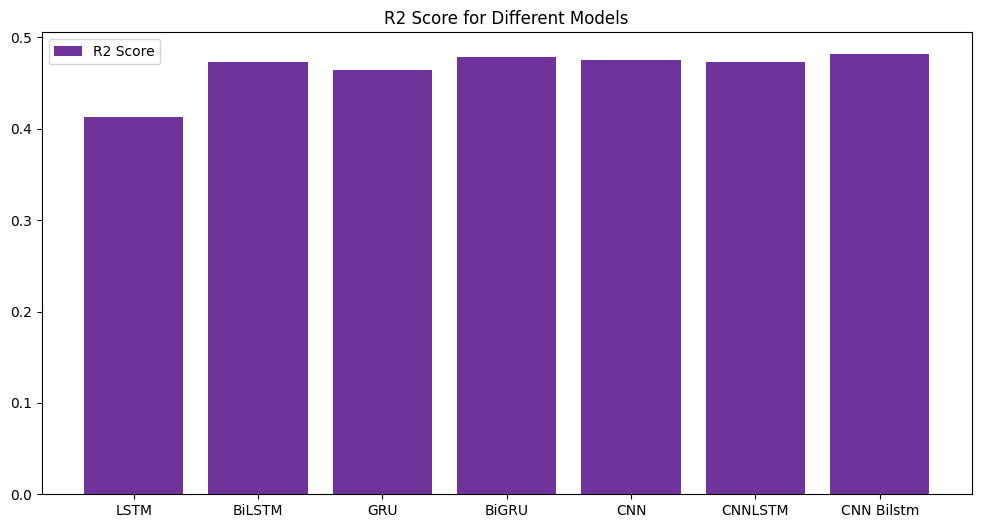

In [147]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [148]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 5.392170350528458
LSTM MSE: 6.5735225352588404
LSTM R2 Score: 0.4131706015212795

BiLSTM MAE: 5.079387414802626
BiLSTM MSE: 6.226265313687023
BiLSTM R2 Score: 0.47353343364659395

GRU MAE: 5.2707524994044626
GRU MSE: 6.280178917040553
GRU R2 Score: 0.4643765486377248

BiGRU MAE: 5.190702905932676
BiGRU MSE: 6.195850141472287
BiGRU R2 Score: 0.4786644262859787

CNN MAE: 5.186353470515279
CNN MSE: 6.216910902982763
CNN R2 Score: 0.4751141838106595

CNN LSTM MAE: 5.294118983074299
CNN LSTM MSE: 6.226188816225928
CNN LSTM R2 Score: 0.473546370168327

CNN BiLSTM MAE: 5.024154931596182
CNN BiLSTM MSE: 6.178662427273622
CNN BiLSTM R2 Score: 0.481552855807058


Plot predictions for each model

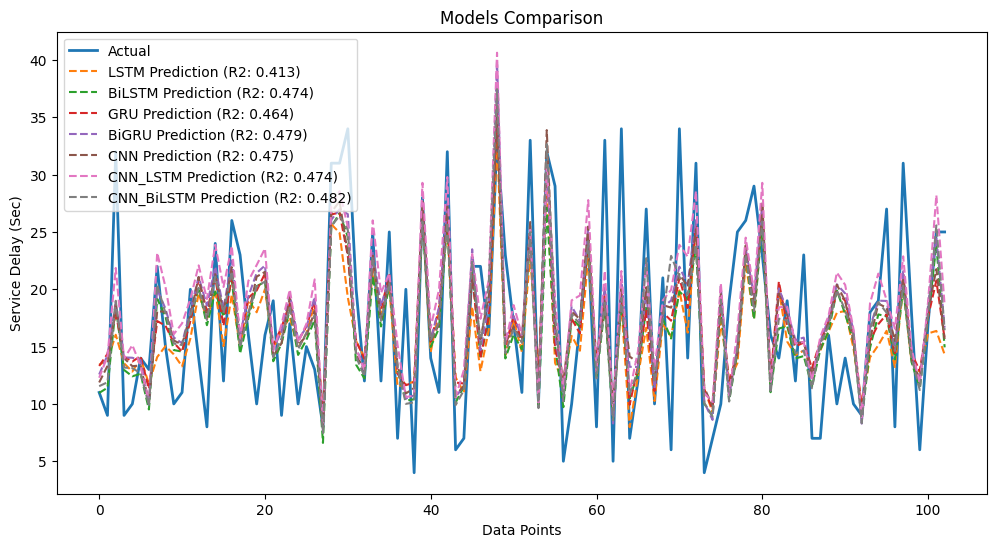

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Models Comparison')
plt.show()

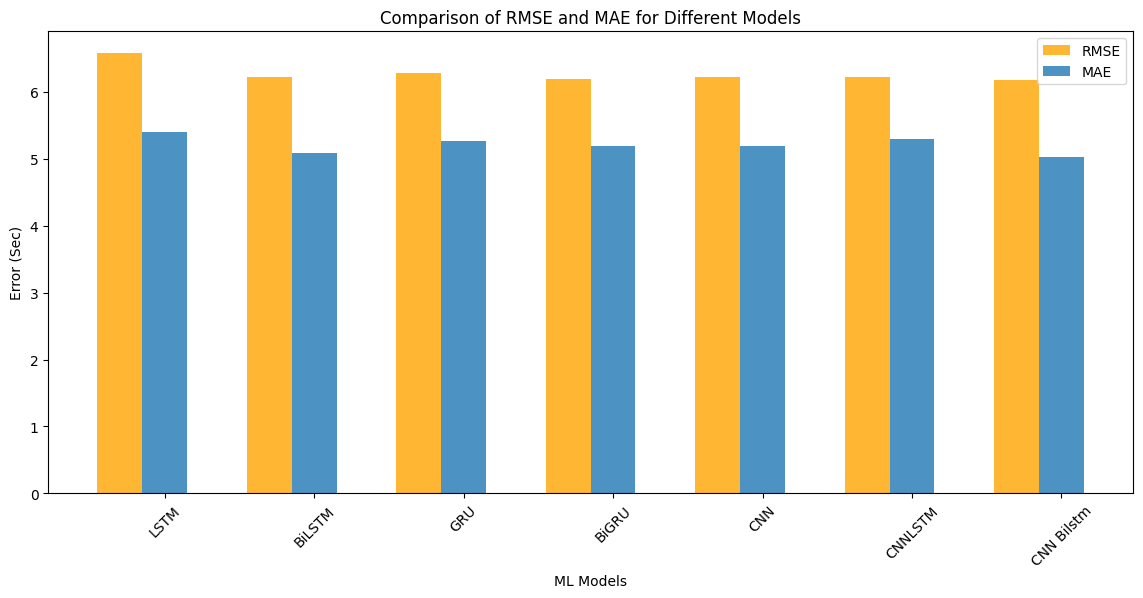

In [150]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE for Different Models')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()